In [1]:
# pip install spacy 
# python -m spacy download en_core_web_md

import spacy

In [2]:
nlp = spacy.load('en_core_web_md')

In [134]:
import pandas as pd 

abstracts = pd.read_csv("abstracts_from_W4383896166.csv", names=["id", "issn", "author", "abstract"], skiprows=1)

abstracts[abstracts['abstract'].str.match('Ethnic boundary crossing takes two', na=False)]
#abstracts

,id,issn,author,abstract
597,W4383896166,0094-0496,"['René D. Flores', 'Maria Vignau Loria', 'Regi...",Ethnic boundary crossing takes two different f...


In [135]:
type(abstracts["abstract"][0])

str

In [136]:
abstracts["abstracts_nlp"] = abstracts["abstract"].apply(lambda x: nlp(x) if type(x)==str else x)

In [137]:
abstracts 

,id,issn,author,abstract,abstracts_nlp
0,W2753533763,0031-9228,"['Thomas S. Kuhn', 'Richard Schlegel']",A good book may have the power to change the w...,"(A, good, book, may, have, the, power, to, cha..."
1,W2045830397,0096-3445,['Eleanor Rosch'],NaN,NaN
2,W2032344422,0033-2909,"['Janet Shibley Hyde', 'Marcia C. Linn']",NaN,NaN
3,W2172033188,0025-1496,['Dan Sperber'],L'A. soutient que les phenomenes culturels son...,"(L'A., soutient, que, les, phenomenes, culture..."
4,W3173881769,0032-3195,"['Pierre Bourdieu', 'Jean-Claude Chamboredon',...",NaN,NaN
...,...,...,...,...,...
784,W2330008435,0039-6338,['Arthur L. Stinchcombe'],"Plantations, especially sugar plantations, cre...","(Plantations, ,, especially, sugar, plantation..."
785,W2072193905,0037-7791,"['Jennifer Stuber', 'Karl Kronebusch']",We developed a conceptual framework to examine...,"(We, developed, a, conceptual, framework, to, ..."
786,W1998835561,0305-7070,"['Christiane Eilders', 'Albrecht Lüter']",This research note deals with the role of the ...,"(This, research, note, deals, with, the, role,..."
787,W2060094683,0095-182X,['Jens Bartelson'],This article analyses existing assumptions abo...,"(This, article, analyses, existing, assumption..."


In [138]:
type(abstracts["abstracts_nlp"][1]) 

float

In [139]:
abstracts["abstracts_nlp"] = abstracts["abstracts_nlp"].apply(lambda x: " ".join([token.text for token in x if not token.is_stop]) if not type(x)==float else x)
abstracts["abstracts_nlp"] = abstracts["abstracts_nlp"].apply(lambda x: nlp(x) if type(x)==str else x)

In [140]:
abstracts.iloc[597]

id                                                     W4383896166
issn                                                     0094-0496
author           ['René D. Flores', 'Maria Vignau Loria', 'Regi...
abstract         Ethnic boundary crossing takes two different f...
abstracts_nlp    (Ethnic, boundary, crossing, takes, different,...
Name: 597, dtype: object

In [141]:
print(abstracts.iloc[597]["abstracts_nlp"])
type(abstracts.iloc[597]["abstracts_nlp"])

Ethnic boundary crossing takes different forms distinct triggers , traits , potential outcomes : transitory crossing , typically short - term , reversible , triggered microcontextual cues , durable crossing , longer - lasting , gradual process motivated macropolitical forces social movements government policies . theoretical distinction helps explain unexpected growth long stigmatized self - identified indigenous population Mexico , tripled 2000 . demographic projection model , authors find natural demographic processes contributed little sudden growth . Instead , experimental census data , find transitory crossing indigenous category activated phrasing changes 2010 census identification question . authors theorize durable crossing simultaneously activated growing salience indigenous movement Mexican government embrace multiculturalism . political factors appear shaping social meaning indigeneity .


spacy.tokens.doc.Doc

In [143]:
abstracts.iloc[597]["abstracts_nlp"].similarity(abstracts.iloc[3]["abstracts_nlp"])

0.4633242276613664

In [149]:
abstracts["abstracts_nlp"].apply(lambda x: abstracts.iloc[597]["abstracts_nlp"].similarity(x) if not type(x)==float else x)

#similarities = [abstracts.iloc[597]["abstracts_nlp"].similarity(abstracts.iloc[i]["abstracts_nlp"]) for i in range(len(abstracts["abstracts_nlp"])) if not None]

0      0.954402
1           NaN
2           NaN
3      0.463324
4           NaN
         ...   
784    0.969928
785    0.901563
786    0.934366
787    0.965562
788    0.957251
Name: abstracts_nlp, Length: 789, dtype: float64

In [289]:
similarities[73]

0.96926846713953

<Axes: ylabel='Count'>

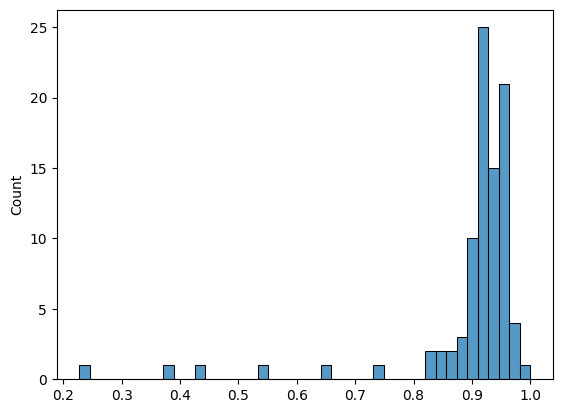

In [266]:
import seaborn as sns
sns.histplot(similarities)

In [287]:
abstracts_nlp[0:10]


print(sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[:10])


list(abstracts_nlp[i] for i in [0, 24, 50, 48, 73, 10, 22, 13, 2, 20] )

[0, 24, 50, 48, 73, 10, 22, 13, 2, 20]


[{'id': 'W2130354913',
  'abstract': Similarity breeds connection . principle — homophily principle — structures network ties type , including marriage , friendship , work , advice , support , information transfer , exchange , comembership , types relationship . result people personal networks homogeneous regard sociodemographic , behavioral , intrapersonal characteristics . Homophily limits people social worlds way powerful implications information receive , attitudes form , interactions experience . Homophily race ethnicity creates strongest divides personal environments , age , religion , education , occupation , gender following roughly order . Geographic propinquity , families , organizations , isomorphic positions social systems create contexts homophilous relations form . Ties nonsimilar individuals dissolve higher rate , sets stage formation niches ( localized positions ) social space . argue research : ( ) basic ecological processes link organizations , associations , cultural

In [290]:
abstracts_nlp[similarities.index(min(similarities))]

{'id': 'W2094961855',
 'abstract': theorems derived Blau recent macrosociological theory social structure tested data intergroup criminal victimization United States . data base taken National Crime Survey ( Ncs ) national samplefor years 1973 1978 . theoretical predictions tested ( 1 ) relative size group different neighborhood contexts inversely related extent outgroup victimization ; ( 2 ) neighborhood heterogeneity positively related rates intergroup victimization . predictions tested data interpersonal crimes rape , robbery , assault , larceny major parameters Blau theory - race age . results support hypotheses ingroup victimization highly prevalent United States , interracial interage criminal encounters strongly positively related neighborhood heterogeneity .}